# Data n Library Setup

In [196]:
import pandas as pd
import numpy as np
import statistics as stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import warnings
import sklearn
warnings.filterwarnings('ignore')
from datetime import datetime as dt
import regex as re

In [197]:
# Plot Setup

from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 10)
rcParams['axes.spines.right'] = True
rcParams['axes.spines.top'] = True
rcParams['axes.spines.bottom'] = True
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [198]:
# Table Display Setup: Show All Columns

pd.set_option('display.max_columns', None)

## Dataset

In [199]:
# Data Import
raw_df = pd.read_csv('/content/drive/MyDrive/Kerja/Laboratory/PBI: ID X - Data Scientist/loan_data_2007_2014.csv')

# Data Preview
raw_df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# About The Data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# EDA

In [201]:
# Data for use
df = raw_df.copy()

## Features Grouping

To group features by its contexts.

In [202]:
# Features with high percetages of null value
high_null_features = []

for col in df.columns:
  if df[col].isnull().sum() > 0.5 * len(df):
    high_null_features.append(col)

# Features with only 1 value
constant_features = []

for col in df.columns:
  if df[col].nunique() == 1:
    constant_features.append(col)

# Other groups
free_text_features = ['url', 'desc', 'title']
identifier_features = ['id', 'member_id']
irrelevent_features = ['Unnamed: 0', 'zip_code', 'addr_state', 'purpose', 'grade', 'emp_title']
time_features = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
over_imbalance_features = ['pymnt_plan']
future_features = ['recoveries', 'next_pymnt_d', 'collection_recovery_fee', 'total_rec_late_fee', 'tot_coll_amt']

In [203]:
to_drop = high_null_features + constant_features + free_text_features + identifier_features + irrelevent_features + time_features + over_imbalance_features + future_features

# Categoric Features
cat_features = []

for col in df.columns:
  if df[col].dtype == 'object' and col not in to_drop:
    cat_features.append(col)

# Numerical Features
num_features = []

for col in df.columns:
  if col not in to_drop + cat_features:
    num_features.append(col)

to_drop contains the features that won't be included in the modelling

## Features Engineering

In [204]:
# Extracting the number in sub_grade
import regex as re

df['grade_number'] = df['sub_grade'].apply(lambda x: re.findall(r'\d', x)[0])

In [205]:
# Aggregating the time-type data
for col in time_features:
  df[col] = pd.to_datetime(df[col].astype(str), format='%b-%y', errors='coerce')

df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'].astype(str), format='%b-%y', errors='coerce')

today_year = df['last_credit_pull_d'].max().year
first_credit_year = df['earliest_cr_line'].dt.year

df.loc[df['earliest_cr_line'].dt.year > df['last_credit_pull_d'].dt.year, 'earliest_cr_line'] -= pd.DateOffset(years=100)
df['first_credit_to_issue_gap'] = ((df['issue_d'] - df['earliest_cr_line']).dt.days / 365).clip(lower=0)

In [206]:
# Simplification: term
df['long_term'] = df['term'].apply(lambda x: 1 if x == ' 60 months' else 0)
df['initial_listing_whole'] = df['initial_list_status'].apply(lambda x: 1 if x == 'w' else 0)

In [207]:
# Simplification: verification_status
df['income_source_verification'] = df['verification_status'].apply(lambda x: 0 if x == 'Not Verified' else 1)

In [208]:
# Assign the target feature
green_status = ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']

df['in_risk'] = df['loan_status'].apply(lambda x: 1 if x not in green_status else 0)

In [209]:
engineered_features = ['grade_number', 'verification_status', 'loan_status', 'term', 'initial_list_status']

To avoid multicolinearity, engineered features (engineered_features) will be dropped.

## Univariate Analysis

In [210]:
# Check the status
df['in_risk'].value_counts()

,count
in_risk,
0,414099
1,52186


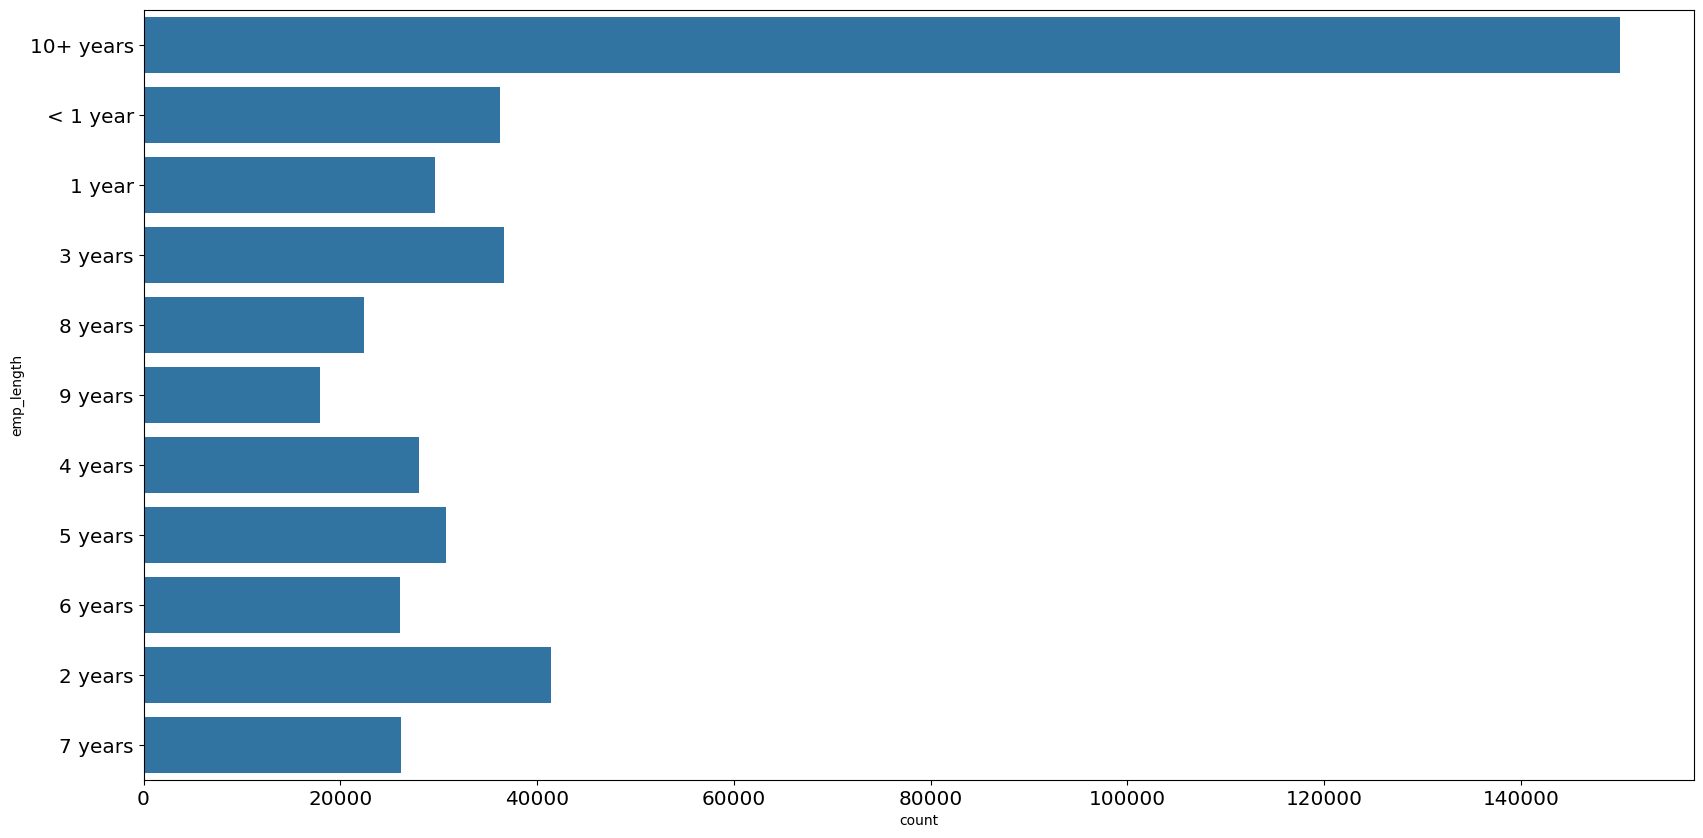

In [211]:
# Demography: Clients' Working Experience
sns.countplot(y='emp_length', data=df)
plt.show()

Found out that majority of the clients been working for more than 10yrs.

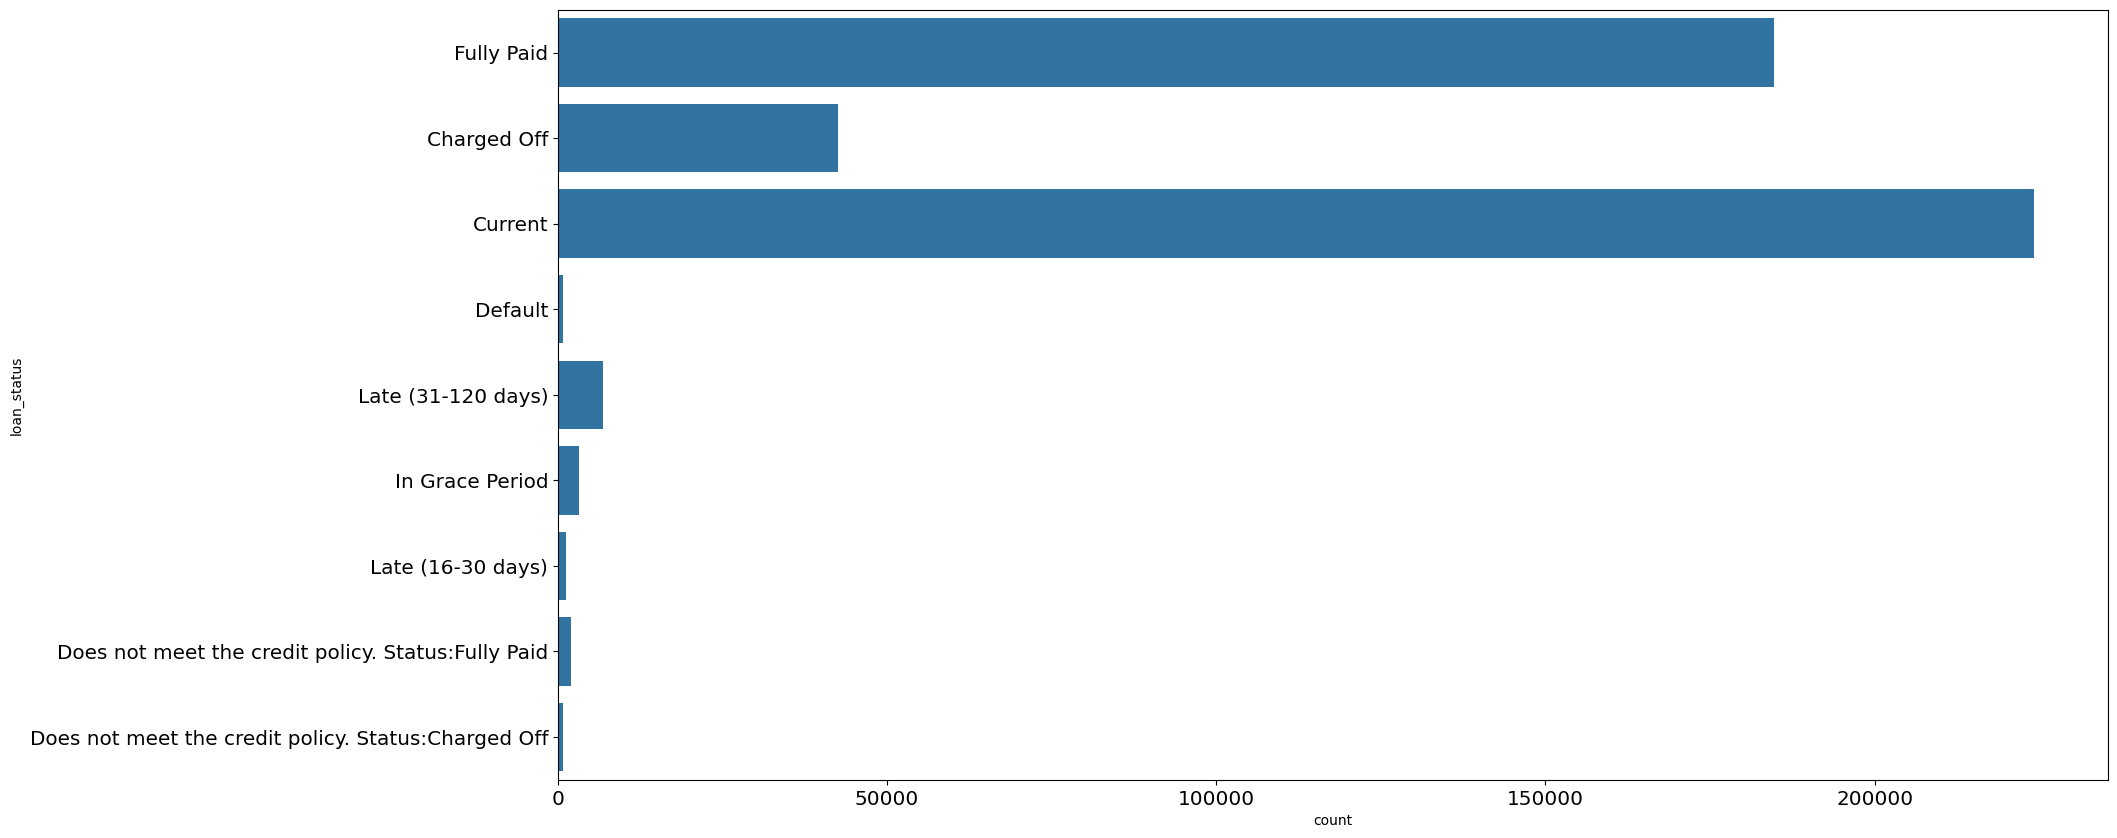

In [212]:
# Monitoring Loan Status
sns.countplot(y='loan_status', data=df)
plt.show()

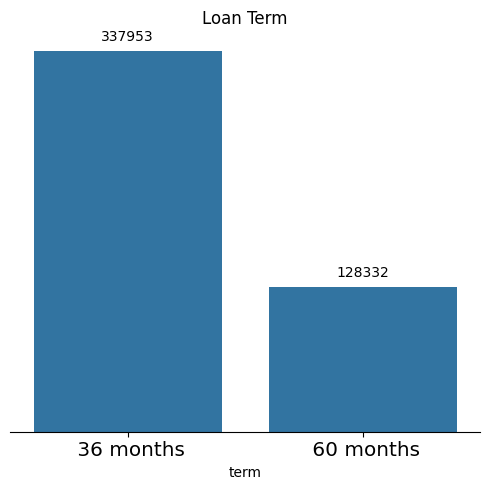

In [213]:
# Number of Loan by its term
sns.countplot(x='term', data=df)
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title('Loan Term')
# no spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
# annotations
for p in plt.gca().patches:
  plt.gca().annotate(
    f'{int(p.get_height())}',
    (p.get_x() + p.get_width() / 2, p.get_height()),
    ha='center', va='bottom',
    xytext=(0, 5), textcoords='offset points'
  )
plt.tight_layout()
plt.show()

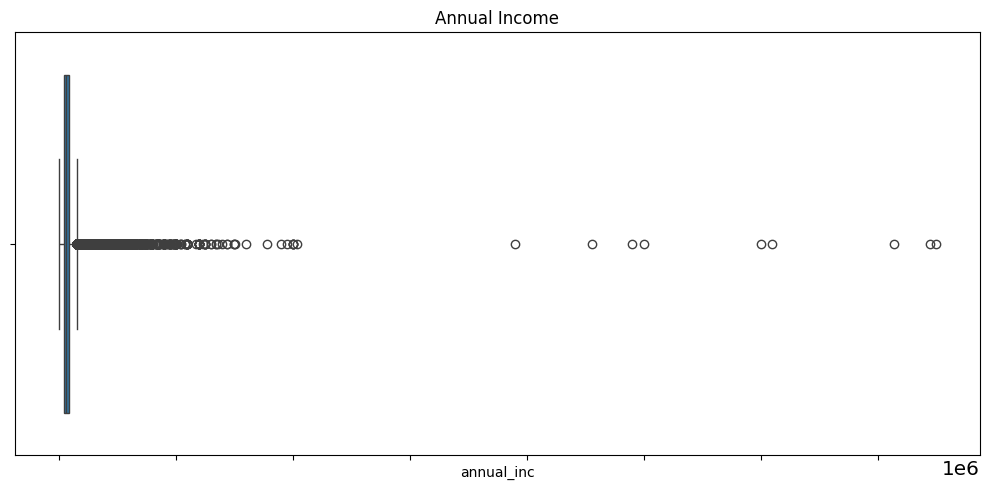

In [214]:
# Outlier checking
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x=df['annual_inc'])
plt.title('Annual Income')
plt.xticks(visible=False)
plt.tight_layout()

## Multivariate Analysis

### Correlation Heatmap

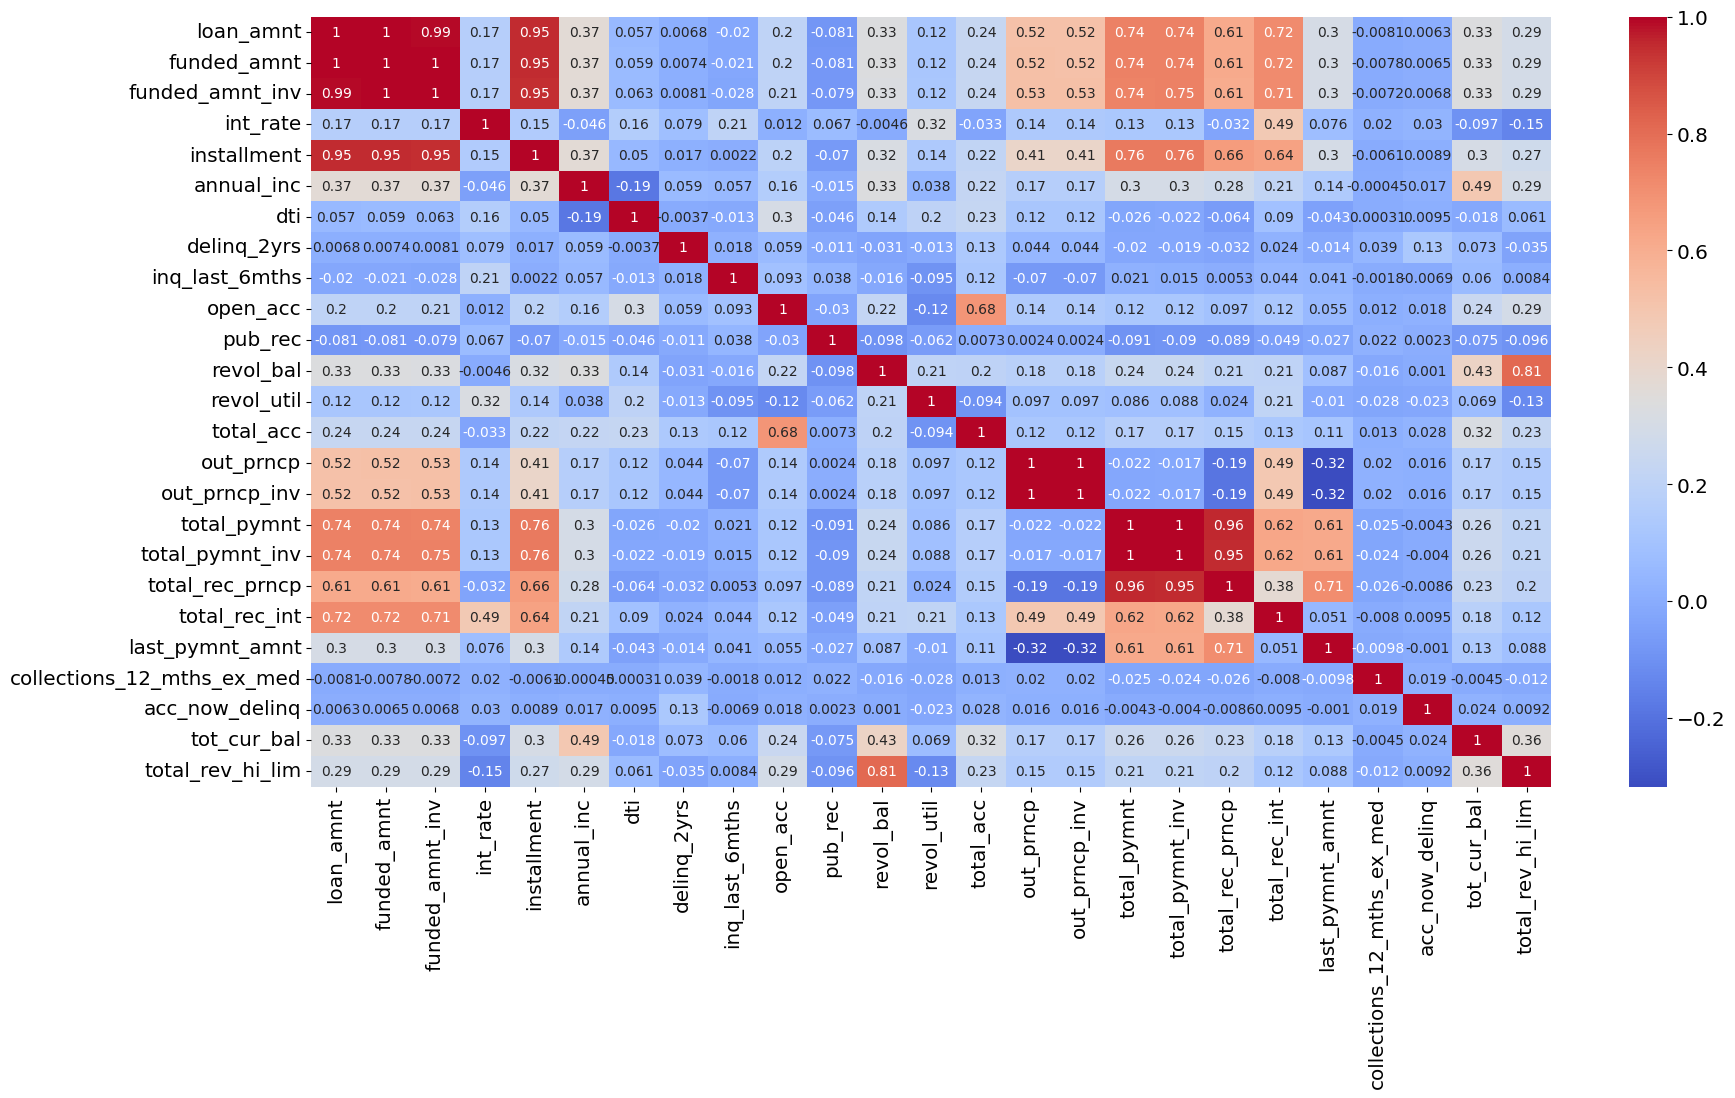

In [215]:
# Correlation
corr = df[num_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [216]:
# High Correlated Features
high_corr_features = []
upper = df[num_features].corr().abs().where(np.triu(np.ones(df[num_features].corr().shape), k=1).astype(bool))
for col in upper.columns:
	for row in upper.index:
		if upper.loc[row, col] > 0.5:
			high_corr_features.append(col)
high_corr_features = list(set(high_corr_features))
high_corr_features

['out_prncp_inv',
 'last_pymnt_amnt',
 'out_prncp',
 'funded_amnt_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rev_hi_lim',
 'funded_amnt',
 'total_rec_int',
 'total_acc',
 'installment']

To avoid multicollinearity, high_corr_features will be dropped from the modelling.

### Insight Findings

In [217]:
import plotly.express as px

fig = px.sunburst(df, path=['grade', 'purpose'])
fig.show()

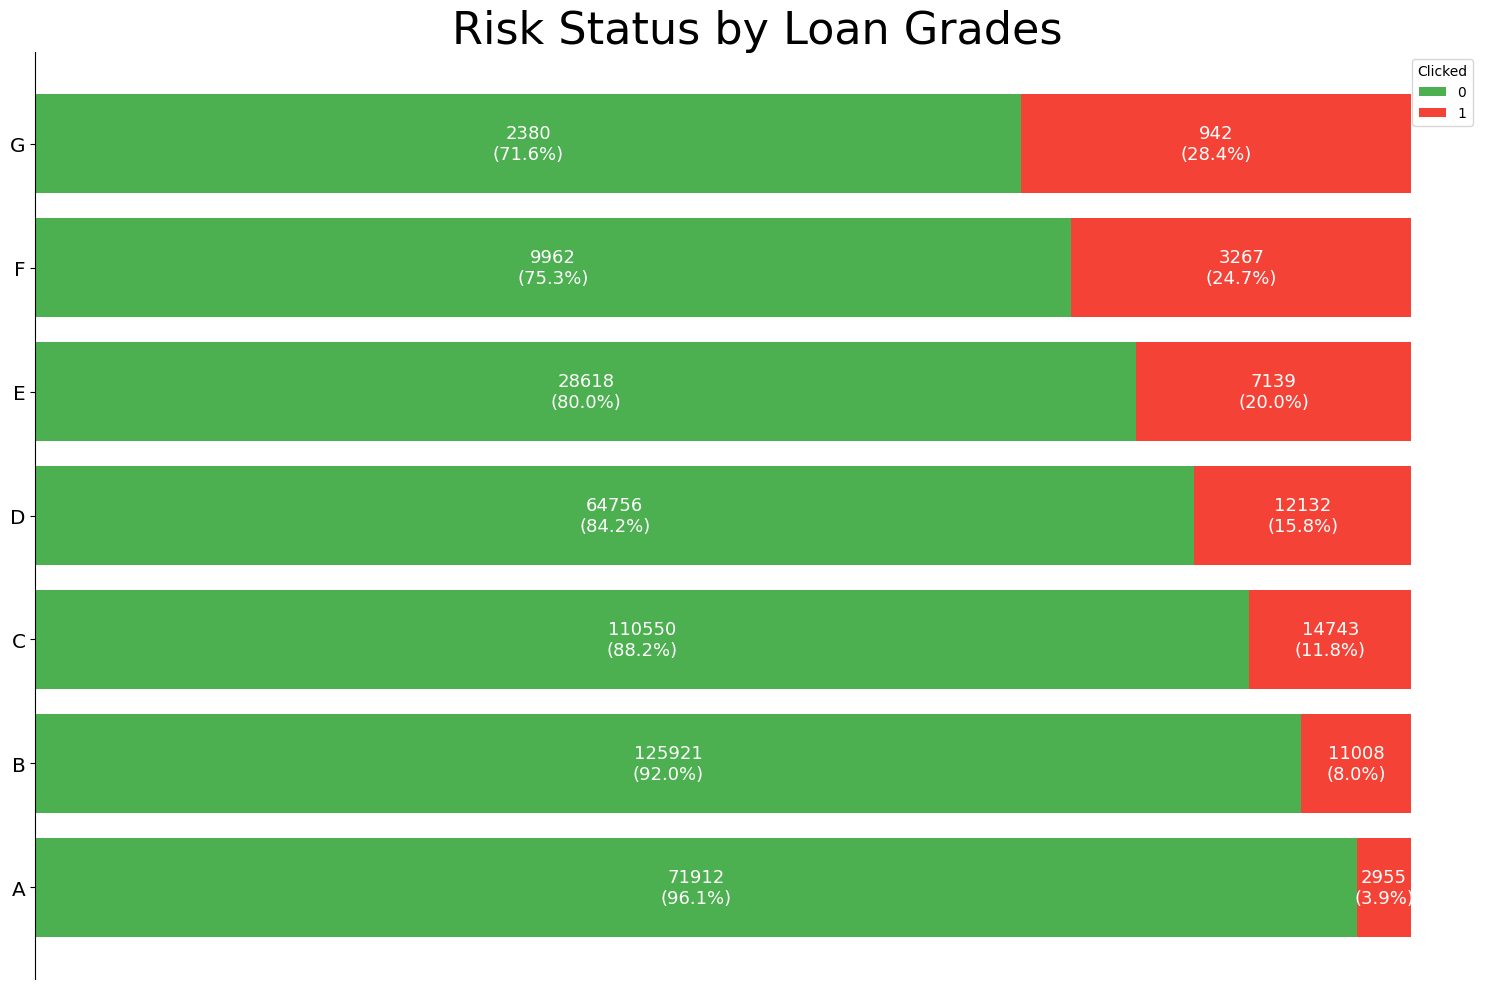

In [218]:
# countplot
# sns.countplot(data=df, x='AgeGroup', hue='Response')
ct = pd.crosstab(df['grade'], df['in_risk'])
ct_perc = ct.div(ct.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15,10))
lefts = [0] * len(ct)
colors = ['#4CAF50', '#F44336']

for i, col in enumerate(ct.columns):
	bars = ax.barh(ct.index, ct_perc[col], left=lefts, color=colors[i], label=col)
	for j, (v, c, left) in enumerate(zip(ct_perc[col], ct[col], lefts)):
		if v > 0:
			ax.text(left + v/2, j, f'{c}\n({v:.1f}%)', ha='center', va='center', color='white', fontsize=13)
	lefts = [lefts[k] + ct_perc[col][k] for k in range(len(lefts))]

ax.set_title('Risk Status by Loan Grades', fontsize=32)
ax.legend(title='Clicked', loc='upper right')
plt.xticks(visible=False)
plt.xlabel('')
# no spine
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks([])
ax.xaxis.set_ticklabels([])
plt.tight_layout()
plt.show()

In [219]:
# Statistical test: int_rate with in_risk
import statsmodels.api as sm

x_stat = df[['int_rate']]
x_stat = sm.add_constant(x_stat)
y_stat = df['in_risk']

model = sm.Logit(y_stat, x_stat)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.335651
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                in_risk   No. Observations:               466285
Model:                          Logit   Df Residuals:                   466283
Method:                           MLE   Df Model:                            1
Date:                Tue, 09 Dec 2025   Pseudo R-squ.:                 0.04239
Time:                        13:26:14   Log-Likelihood:            -1.5651e+05
converged:                       True   LL-Null:                   -1.6344e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8933      0.017   -226.011      0.000      -3.927      -3.860
int_rate       0.1236      0.

Hypothesis:
H0: Interest rate doesn't affect the risk significantly.
H1: Interest rate affect the risk significantly.
Decision making rules: reject H0 if p-value < 0.05.

Results: p-value nears 0
Conclusion: Interest rate affect the risk significantly.

In [220]:
df.groupby('grade')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,74867.0,13399.359197,7301.204030,500.0,7700.00,12000.0,19000.0,35000.0
B,136929.0,13120.041773,7353.689830,500.0,7800.00,12000.0,17600.0,35000.0
C,125293.0,14197.554333,8352.882041,500.0,8000.00,12000.0,20000.0,35000.0
D,76888.0,15062.110798,8966.049001,500.0,8000.00,13375.0,20125.0,35000.0
E,35757.0,17534.303074,9510.329560,600.0,10000.00,16500.0,24925.0,35000.0
F,13229.0,18433.356641,9446.264574,1000.0,11375.00,18000.0,25000.0,35000.0
G,3322.0,20610.791692,8777.083145,600.0,13981.25,20000.0,27300.0,35000.0


In [221]:
df.groupby('grade')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,74867.0,7.538624,0.973636,5.42,6.62,7.69,8.39,9.63
B,136929.0,11.503253,1.294617,6.00,10.51,11.67,12.49,14.09
C,125293.0,14.634089,1.183195,6.00,13.79,14.49,15.31,17.27
D,76888.0,17.540598,1.385031,6.00,16.49,17.57,18.49,20.31
E,35757.0,20.487115,1.637443,6.00,19.52,20.50,21.70,23.40
F,13229.0,23.551352,1.716740,6.00,23.33,23.76,24.50,25.57
G,3322.0,24.838393,2.062895,16.59,24.83,25.80,25.89,26.06


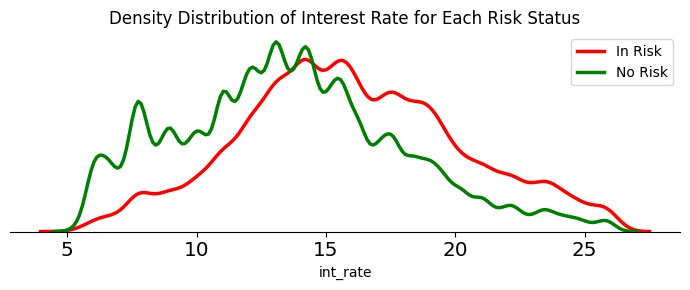

In [222]:
# Interest rate for each flag status

df_red = df[df['in_risk'] == 1]
df_green = df[df['in_risk'] == 0]

plt.figure(figsize=(7,3))

sns.kdeplot(df_red['int_rate'], label='In Risk', color='red')
sns.kdeplot(df_green['int_rate'], label='No Risk', color='green')

plt.title('Density Distribution of Interest Rate for Each Risk Status')
plt.legend()
plt.yticks(visible=False)
plt.ylabel('')
# no spine
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.tight_layout()
plt.show()

In [223]:
# Difference test of interest rate
green_int = df_green['int_rate']
red_int = df_red['int_rate']

green_int = green_int.dropna()
red_int = red_int.dropna()

from scipy.stats import ttest_ind

stat, p = ttest_ind(green_int, red_int)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=-121.119, p=0.000


Hypothesis:
H0: Interest rates are same.
H1: Interest rates aren't same.
Decision making rules: reject H0 if p-value < 0.05.

Results: p-value nears 0
Conclusion: Interest rate aren't same.

In [225]:
df.groupby('grade')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,74863.0,82658.586278,63517.175765,3300.0,50000.0,72000.000,100000.0,7446395.0
B,136929.0,72304.457095,53687.669619,2000.0,45000.0,62000.000,86500.0,7141778.0
C,125293.0,70322.501511,53172.384406,4000.0,43500.0,60000.000,85000.0,6000000.0
D,76888.0,69744.962625,46421.191226,4000.0,43000.0,60000.000,84000.0,2000000.0
E,35757.0,73359.233242,61887.671778,3000.0,45000.0,62500.000,87350.0,7500000.0
F,13229.0,75301.567065,49021.668216,4800.0,48000.0,65000.000,90000.0,1440000.0
G,3322.0,86232.858952,64653.597841,1896.0,52000.0,72057.195,100000.0,900000.0


In [224]:
# Difference test of annual income
green_inc = df_green['annual_inc']
red_inc = df_red['annual_inc']

green_inc = green_inc.dropna()
red_inc = red_inc.dropna()

from scipy.stats import ttest_ind

stat, p = ttest_ind(green_inc, red_inc)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=33.832, p=0.000


Hypothesis:
H0: Annual incomes are same.
H1: Annual incomes aren't same.
Decision making rules: reject H0 if p-value < 0.05.

Results: p-value nears 0
Conclusion: Annual incomes aren't same.

## Complete DF

In [227]:
complete_df = df.copy()

# Feature Selection

In [228]:
# Features Selection
to_drop = to_drop + high_corr_features + engineered_features

df.drop(columns=to_drop, inplace=True)

In [229]:
# Assign x and y
y = df['in_risk']
x = df.drop(columns=['in_risk'])

## Final Features Grouping

In [230]:
# Assign new groups of features
new_cat_features = ['income_source_verification', 'long_term', 'initial_listing_whole']
final_cat_features = []

for i in cat_features:
  if i in x.columns:
    final_cat_features.append(i)

for i in new_cat_features:
  final_cat_features.append(i)

final_num_features = []

for i in x.columns:
  if i not in final_cat_features:
    final_num_features.append(i)

In [231]:
# Assign binary features for easier encode
binary_features = []

for col in final_cat_features:
  if x[col].nunique() == 2:
    binary_features.append(col)

In [232]:
final_features = list(x.columns)

# Data Splitting

In [233]:
# Split the data for modelling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((373028, 20), (93257, 20), (373028,), (93257,))

# Data Preprocessing

## Missing Values

In [234]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

x_train[final_cat_features] = cat_imputer.fit_transform(x_train[final_cat_features])
x_train[final_num_features] = num_imputer.fit_transform(x_train[final_num_features])

x_test[final_cat_features] = cat_imputer.transform(x_test[final_cat_features])
x_test[final_num_features] = num_imputer.transform(x_test[final_num_features])

## Duplicates

In [235]:
x_train.duplicated().sum()

np.int64(0)

## Encode

In [236]:
x_train[final_cat_features]

,sub_grade,emp_length,home_ownership,income_source_verification,long_term,initial_listing_whole
427211,A5,3 years,MORTGAGE,1,0,0
206088,C1,6 years,MORTGAGE,0,0,0
136020,A5,10+ years,MORTGAGE,1,0,0
412305,D1,7 years,RENT,1,0,0
36159,C2,5 years,MORTGAGE,1,0,0
...,...,...,...,...,...,...
259178,B1,3 years,MORTGAGE,0,0,1
365838,B5,10+ years,RENT,1,0,0
131932,B5,10+ years,RENT,0,0,0
146867,B2,10+ years,MORTGAGE,1,0,0


In [237]:
letters = list(sorted(complete_df['grade'].unique()))
sub_grade_map = {}
sub_grade_value = 1
for l in letters:
	for n in range(1,6):
		sub_grade_map[f'{l}{n}'] = sub_grade_value
		sub_grade_value += 1
sub_grade_map

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35}

In [238]:
# emp_lengt
emp_length_map = {
  '< 1 year': 0,
  '1 year': 1,
  '2 years': 2,
  '3 years': 3,
  '4 years': 4,
  '5 years': 5,
  '6 years': 6,
  '7 years': 7,
  '8 years': 8,
  '9 years': 9,
  '10+ years': 10
}

# home_ownersip
home_ownership_map = {
  'NONE': 0,
  'RENT': 1,
  'OTHER': 2,
  'ANY': 2,
  'MORTGAGE': 3,
  'OWN': 4
}

In [239]:
# Encoding
xs = [x_train, x_test]
maps = {
    'sub_grade': sub_grade_map,
    'emp_length': emp_length_map,
    'home_ownership': home_ownership_map
}

for df in xs:
	for col, mp in maps.items():
		df[col] = df[col].map(mp)

## Feature Scaling

In [240]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

r_scaler = RobustScaler() # For numeric features
mm_scaler = MinMaxScaler() # For encoded (ordinal) categoric features

x_train[final_cat_features] = mm_scaler.fit_transform(x_train[final_cat_features])
x_test[final_cat_features] = mm_scaler.transform(x_test[final_cat_features])

x_train[final_num_features] = r_scaler.fit_transform(x_train[final_num_features])
x_test[final_num_features] = r_scaler.transform(x_test[final_num_features])

## Label Balancing

In [241]:
# Label Balancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

# Model Development & Evaluation

In [242]:
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

## Logistic Regression

In [243]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_test_pred = lr.predict(x_test)

In [244]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.627127186162969
Precision: 0.17673146377735288
Recall: 0.6382468591157572
F1 Score: 0.2768130108354304
ROC AUC: 0.6319871262861172


In [245]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.63      0.75     82830
           1       0.18      0.64      0.28     10427

    accuracy                           0.63     93257
   macro avg       0.55      0.63      0.51     93257
weighted avg       0.85      0.63      0.70     93257



In [246]:
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
cm_df

,Predicted: 0,Predicted: 1
Actual: 0,51829,31001
Actual: 1,3772,6655


## Decision Tree

In [247]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_test_pred = dt.predict(x_test)

In [248]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.7897208788616404
Precision: 0.1525539160045403
Recall: 0.19334420255106935
F1 Score: 0.17054394721258775
ROC AUC: 0.5290697832748104


In [249]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88     82830
           1       0.15      0.19      0.17     10427

    accuracy                           0.79     93257
   macro avg       0.52      0.53      0.53     93257
weighted avg       0.81      0.79      0.80     93257



In [250]:
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
cm_df

,Predicted: 0,Predicted: 1
Actual: 0,71631,11199
Actual: 1,8411,2016


## Random Forest

In [251]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_test_pred = rf.predict(x_test)

In [252]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8811027590422167
Precision: 0.27951967978652437
Recall: 0.040184137335762926
F1 Score: 0.0702666443065571
ROC AUC: 0.5135726916305762


In [253]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     82830
           1       0.28      0.04      0.07     10427

    accuracy                           0.88     93257
   macro avg       0.59      0.51      0.50     93257
weighted avg       0.82      0.88      0.84     93257



In [254]:
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
cm_df

,Predicted: 0,Predicted: 1
Actual: 0,81750,1080
Actual: 1,10008,419


## XGBoost

In [255]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_test_pred = xgb.predict(x_test)

In [256]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8873971927040329
Precision: 0.32710280373831774
Recall: 0.006713340366356574
F1 Score: 0.013156658208814962
ROC AUC: 0.5024874199115377


In [257]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     82830
           1       0.33      0.01      0.01     10427

    accuracy                           0.89     93257
   macro avg       0.61      0.50      0.48     93257
weighted avg       0.83      0.89      0.84     93257



In [258]:
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
cm_df

,Predicted: 0,Predicted: 1
Actual: 0,82686,144
Actual: 1,10357,70


## MLP

In [259]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(x_train, y_train)
y_test_pred = mlp.predict(x_test)

In [260]:
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.748576514363533
Precision: 0.1850812693498452
Recall: 0.36693200345257504
F1 Score: 0.2460529277468729
ROC AUC: 0.581775792864764


In [261]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85     82830
           1       0.19      0.37      0.25     10427

    accuracy                           0.75     93257
   macro avg       0.55      0.58      0.55     93257
weighted avg       0.83      0.75      0.78     93257



In [262]:
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, columns=['Predicted: 0', 'Predicted: 1'], index=['Actual: 0', 'Actual: 1'])
cm_df

,Predicted: 0,Predicted: 1
Actual: 0,65984,16846
Actual: 1,6601,3826


# Model Interpretation

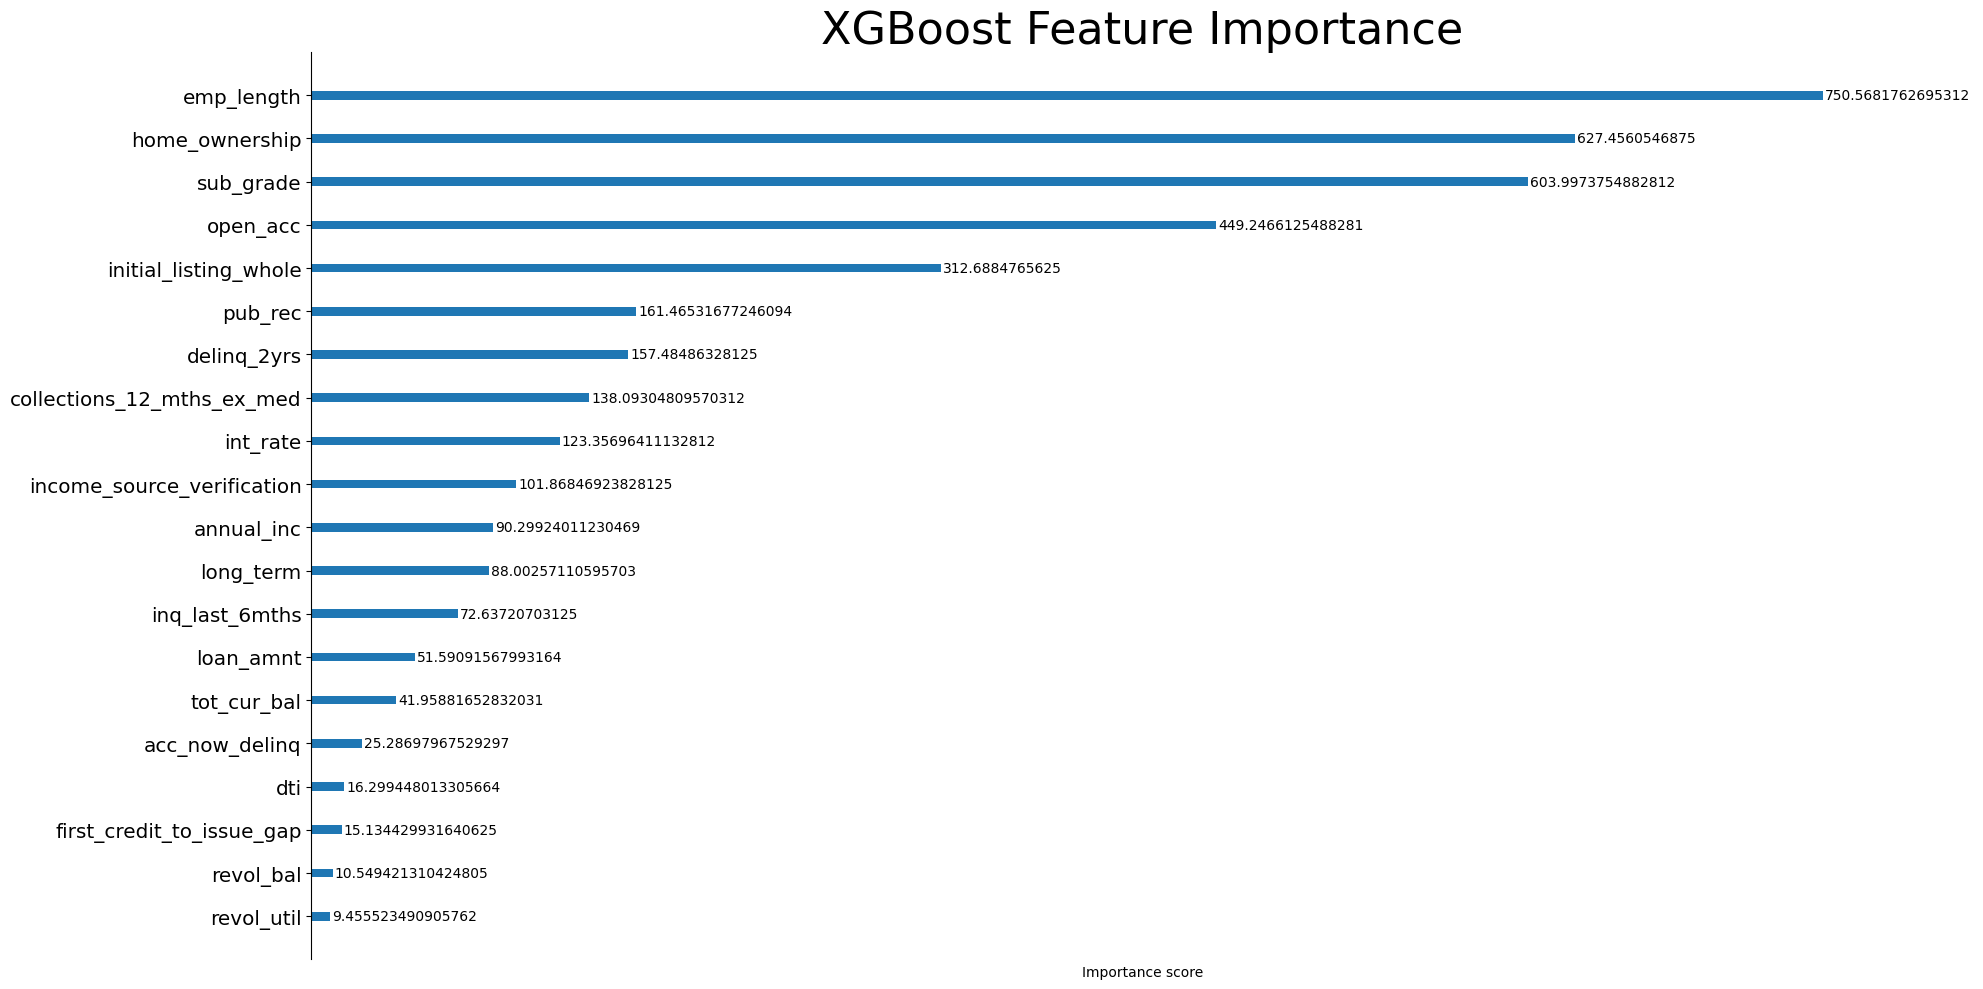

In [269]:
# Feature importance analysis
from xgboost import plot_importance

plot_importance(xgb, importance_type='gain', max_num_features=len(final_features))
plt.grid(False)
plt.ylabel('')
plt.title('XGBoost Feature Importance', fontsize = 32)
# no spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.xticks([])
plt.tight_layout()
plt.show()

In [271]:
# Feature importance data
xgb_importances = xgb.get_booster().get_score(importance_type='gain')

feature_importances = pd.DataFrame({
    'feature': list(xgb_importances.keys()),
    'importance': list(xgb_importances.values()),
}).sort_values('importance', ascending=False)

feature_importances['weight'] = feature_importances['importance'] / feature_importances['importance'].sum()
feature_importances

,feature,importance,weight
3,emp_length,750.568176,0.195082
4,home_ownership,627.456055,0.163084
2,sub_grade,603.997375,0.156987
9,open_acc,449.246613,0.116765
18,initial_listing_whole,312.688477,0.081272
10,pub_rec,161.465317,0.041967
7,delinq_2yrs,157.484863,0.040932
13,collections_12_mths_ex_med,138.093048,0.035892
1,int_rate,123.356964,0.032062
19,income_source_verification,101.868469,0.026477


In [272]:
# Model export
import joblib

joblib.dump(xgb, 'xgb_model.pkl')

['xgb_model.pkl']